In [ ]:
#Questão 3

In [3]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [7]:
breast_cancer_data = pd.read_csv("/content/breast-cancer.csv")

In [10]:
print(breast_cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   espessura                 699 non-null    int64 
 1   uniformidade_tamanho      699 non-null    int64 
 2   uniformidade_forma        699 non-null    int64 
 3   aderencia_marginal        699 non-null    int64 
 4   tamanho_celula_epitelial  699 non-null    int64 
 5   nucleo_descoberto         699 non-null    object
 6   cromatina_branda          699 non-null    int64 
 7   nucleolos_normais         699 non-null    int64 
 8   mitose                    699 non-null    int64 
 9   classe                    699 non-null    object
dtypes: int64(8), object(2)
memory usage: 54.7+ KB
None


In [11]:
breast_cancer_data['nucleo_descoberto'] = pd.to_numeric(breast_cancer_data['nucleo_descoberto'].replace('?', np.nan))

In [12]:
breast_cancer_data['nucleo_descoberto'].fillna(breast_cancer_data['nucleo_descoberto'].median(), inplace=True)

<ipython-input-12-919e47637dbb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer_data['nucleo_descoberto'].fillna(breast_cancer_data['nucleo_descoberto'].median(), inplace=True)


In [13]:
label_encoder = LabelEncoder()
breast_cancer_data['classe'] = label_encoder.fit_transform(breast_cancer_data['classe'])

In [14]:
X = breast_cancer_data.drop(columns=['classe'])
y = breast_cancer_data['classe']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
svm_model = SVC(kernel='linear', probability=True)  # Usando kernel linear
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [17]:
y_pred = svm_model.predict(X_test)

In [18]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [19]:
print(f'Precisão: {precision}')
print(f'Recall: {recall}')

Precisão: 0.9761904761904762
Recall: 0.9111111111111111


In [20]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



In [ ]:
#Questão 6

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [22]:
breast_cancer_data = pd.read_csv("/content/breast-cancer.csv")

In [23]:
breast_cancer_data['nucleo_descoberto'] = pd.to_numeric(breast_cancer_data['nucleo_descoberto'].replace('?', np.nan))

In [24]:
breast_cancer_data['nucleo_descoberto'].fillna(breast_cancer_data['nucleo_descoberto'].median(), inplace=True)

<ipython-input-24-919e47637dbb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer_data['nucleo_descoberto'].fillna(breast_cancer_data['nucleo_descoberto'].median(), inplace=True)


In [25]:
label_encoder = LabelEncoder()
breast_cancer_data['classe'] = label_encoder.fit_transform(breast_cancer_data['classe'])


In [26]:
X = breast_cancer_data.drop(columns=['classe'])
y = breast_cancer_data['classe']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]

In [30]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.9946198830409356


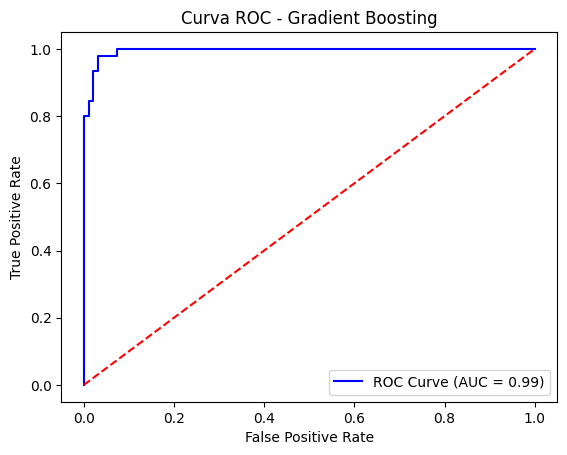

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Gradient Boosting')
plt.legend()
plt.show()